In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(data_home='./dataset',subset='train',
                                  categories=categories,shuffle=True,random_state=42)
twenty_test = fetch_20newsgroups(data_home='./dataset',subset='test',
                                 categories=categories, shuffle=True, random_state=42)


In [ ]:
twenty_train.data

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# 在测试集上的性能评估
import numpy as np
Counter = CountVectorizer(stop_words='english')
Counter.fit(twenty_train.data)
Counter.fit(twenty_test.data)
x_train_count=Counter.transform(twenty_train.data)
x_test_count=Counter.transform(twenty_test.data)

In [3]:
print(x_train_count)

  (0, 119)	2
  (0, 423)	1
  (0, 1767)	2
  (0, 2352)	1
  (0, 3121)	2
  (0, 3417)	1
  (0, 4224)	1
  (0, 7156)	4
  (0, 7457)	3
  (0, 7718)	1
  (0, 8124)	1
  (0, 8128)	2
  (0, 8241)	1
  (0, 10092)	1
  (0, 10791)	2
  (0, 11873)	1
  (0, 12038)	2
  (0, 12369)	1
  (0, 13170)	1
  (0, 13417)	1
  (0, 13651)	1
  (0, 14342)	1
  (0, 14376)	2
  (0, 14383)	1
  (0, 14709)	2
  :	:
  (2256, 17214)	1
  (2256, 17576)	1
  (2256, 17583)	1
  (2256, 17725)	1
  (2256, 17733)	1
  (2256, 17970)	1
  (2256, 19022)	2
  (2256, 20342)	1
  (2256, 21771)	1
  (2256, 22369)	1
  (2256, 23031)	1
  (2256, 23073)	1
  (2256, 24731)	1
  (2256, 25008)	1
  (2256, 25658)	1
  (2256, 25923)	3
  (2256, 26060)	1
  (2256, 26293)	3
  (2256, 26527)	1
  (2256, 26768)	1
  (2256, 27265)	1
  (2256, 28250)	1
  (2256, 28887)	1
  (2256, 30128)	1
  (2256, 30386)	1


In [4]:
x_test_count.shape

(1502, 30482)

In [6]:
print(x_train)

  (0, 29646)	0.04728728123850258
  (0, 28947)	0.10320987558561678
  (0, 28696)	0.07111316200246669
  (0, 28673)	0.09534201036277591
  (0, 28409)	0.12499073487561276
  (0, 27641)	0.1200758316716855
  (0, 27426)	0.05386091919421854
  (0, 27406)	0.09985392396080776
  (0, 27244)	0.09885872085777618
  (0, 26527)	0.01840677363566864
  (0, 26160)	0.07383239074753992
  (0, 23790)	0.07593831618324601
  (0, 22290)	0.09791457679895682
  (0, 21854)	0.03797896306193983
  (0, 21607)	0.14029773938256326
  (0, 20983)	0.11261252720957661
  (0, 20965)	0.07769266908807906
  (0, 20342)	0.01997833681952289
  (0, 19659)	0.03964839413846657
  (0, 18423)	0.21582857691298465
  (0, 17358)	0.10731722842291665
  (0, 17196)	0.018431283324557245
  (0, 17149)	0.03833708279461463
  (0, 16814)	0.2805954787651265
  (0, 16549)	0.03797896306193983
  :	:
  (2256, 14756)	0.10599714272373967
  (2256, 14565)	0.17128297054893032
  (2256, 13759)	0.08347178569414156
  (2256, 12360)	0.09006003028297684
  (2256, 11677)	0.07437880

In [7]:
x_test.shape

(1502, 30482)

In [8]:
# 朴素贝叶斯分类
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
text_clf =MultinomialNB()
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
print(classification_report(twenty_test.target, predicted, target_names=categories))
acc_score1=accuracy_score(predicted,twenty_test.target)
recall_score1=recall_score(predicted,twenty_test.target,average='macro')
f1_score1=f1_score(predicted,twenty_test.target,average='macro')
pre_score1=precision_score(predicted,twenty_test.target,average='macro')

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.72      0.82       319
soc.religion.christian       0.94      0.96      0.95       389
         comp.graphics       0.95      0.88      0.91       396
               sci.med       0.78      0.97      0.87       398

              accuracy                           0.89      1502
             macro avg       0.91      0.88      0.89      1502
          weighted avg       0.90      0.89      0.89      1502



In [18]:
# 随机梯度下降分类器
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
text_clf =SGDClassifier(loss='hinge',penalty='l2',
                         alpha=1e-3, random_state=42,
                          max_iter=1000, tol=None)
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
print(classification_report(twenty_test.target, predicted, target_names=categories))
acc_score2=accuracy_score(predicted,twenty_test.target)
recall_score2=recall_score(predicted,twenty_test.target,average='macro')
f1_score2=f1_score(predicted,twenty_test.target,average='macro')
pre_score2=precision_score(predicted,twenty_test.target,average='macro')

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.80      0.87       319
soc.religion.christian       0.87      0.98      0.93       389
         comp.graphics       0.95      0.89      0.92       396
               sci.med       0.89      0.95      0.92       398

              accuracy                           0.91      1502
             macro avg       0.92      0.91      0.91      1502
          weighted avg       0.92      0.91      0.91      1502



In [10]:
# KNN分类器
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
text_clf =KNeighborsClassifier()
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
print(classification_report(twenty_test.target, predicted, target_names=categories))
acc_score3=accuracy_score(predicted,twenty_test.target)
recall_score3=recall_score(predicted,twenty_test.target,average='macro')
f1_score3=f1_score(predicted,twenty_test.target,average='macro')
pre_score3=precision_score(predicted,twenty_test.target,average='macro')

                        precision    recall  f1-score   support

           alt.atheism       0.79      0.86      0.83       319
soc.religion.christian       0.85      0.88      0.86       389
         comp.graphics       0.84      0.75      0.80       396
               sci.med       0.84      0.85      0.85       398

              accuracy                           0.83      1502
             macro avg       0.83      0.84      0.83      1502
          weighted avg       0.84      0.83      0.83      1502



In [11]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.svm import SVC
text_clf =SVC(decision_function_shape = 'ovo')
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
print(classification_report(twenty_test.target, predicted, target_names=categories))
acc_score4=accuracy_score(predicted,twenty_test.target)
recall_score4=recall_score(predicted,twenty_test.target,average='macro')
f1_score4=f1_score(predicted,twenty_test.target,average='macro')
pre_score4=precision_score(predicted,twenty_test.target,average='macro')

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.74      0.84       319
soc.religion.christian       0.86      0.98      0.92       389
         comp.graphics       0.93      0.90      0.92       396
               sci.med       0.88      0.96      0.92       398

              accuracy                           0.90      1502
             macro avg       0.91      0.89      0.90      1502
          weighted avg       0.91      0.90      0.90      1502



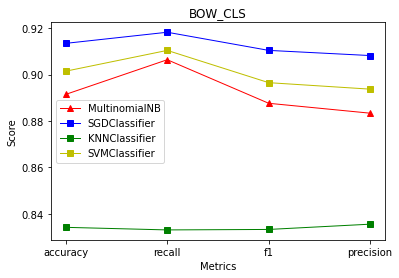

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Mul_score=[acc_score1,recall_score1,f1_score1,pre_score1]
SGD_score=[acc_score2,recall_score2,f1_score2,pre_score2]
KNN_score=[acc_score3,recall_score3,f1_score3,pre_score3]
SVM_score=[acc_score4,recall_score4,f1_score4,pre_score4]

score=['accuracy','recall','f1','precision']
plt.plot(score, Mul_score, color="r", linestyle="-", 
         marker="^", linewidth=1, label="MultinomialNB")
plt.plot(score, SGD_score, color="b", linestyle="-",
         marker="s", linewidth=1, label="SGDClassifier")
plt.plot(score, KNN_score, color="g", linestyle="-",
         marker="s", linewidth=1, label="KNNClassifier")
plt.plot(score, SVM_score, color="y", linestyle="-",
         marker="s", linewidth=1, label="SVMClassifier")
plt.legend()
plt.ylabel("Score", loc='center')
plt.xlabel("Metrics", loc='center')
plt.title("BOW_CLS")

plt.show()

In [49]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.linear_model import SGDClassifier
acc_score=[]
re_score=[]
f_score=[]
pre_score=[]
Alpha=[]
for i in range(20):
    alpha=0.000001*(i+1)*2
    Alpha.append(alpha)
    text_clf =SGDClassifier(loss='hinge',penalty='l2',
                             alpha=alpha, random_state=42,
                              max_iter=1000, tol=None)
    text_clf.fit(x_train, twenty_train.target)
    predicted = text_clf.predict(x_test)
    acc_score.append(accuracy_score(predicted,twenty_test.target))
    re_score.append(recall_score(predicted,twenty_test.target,average='macro'))
    f_score.append(f1_score(predicted,twenty_test.target,average='macro'))
    pre_score.append(precision_score(predicted,twenty_test.target,average='macro'))

In [50]:
Alpha

[2e-06,
 4e-06,
 6e-06,
 8e-06,
 9.999999999999999e-06,
 1.2e-05,
 1.4e-05,
 1.6e-05,
 1.8e-05,
 1.9999999999999998e-05,
 2.2e-05,
 2.4e-05,
 2.6e-05,
 2.8e-05,
 2.9999999999999997e-05,
 3.2e-05,
 3.4e-05,
 3.6e-05,
 3.7999999999999995e-05,
 3.9999999999999996e-05]

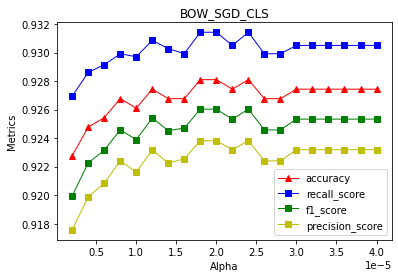

In [51]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(Alpha, acc_score, color="r", linestyle="-", 
         marker="^", linewidth=1, label="accuracy")
plt.plot(Alpha, re_score, color="b", linestyle="-",
         marker="s", linewidth=1, label="recall_score")
plt.plot(Alpha, f_score, color="g", linestyle="-",
         marker="s", linewidth=1, label="f1_score")
plt.plot(Alpha, pre_score, color="y", linestyle="-",
         marker="s", linewidth=1, label="precision_score")
plt.legend()
plt.ylabel("Metrics", loc='center')
plt.xlabel("Alpha", loc='center')
plt.title("BOW_SGD_CLS")

plt.show()

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
# 在测试集上的性能评估
import numpy as np
Counter1 = CountVectorizer()
Counter1.fit(twenty_train.data)
Counter1.fit(twenty_test.data)
x_train_count1=Counter1.transform(twenty_train.data)
x_test_count1=Counter1.transform(twenty_test.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidfer1 = TfidfTransformer()
tfidfer1.fit(x_train_count1)
tfidfer1.fit(x_test_count1)
x_train1=tfidfer1.transform(x_train_count1)
x_test1=tfidfer1.transform(x_test_count1)

# 朴素贝叶斯分类
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.naive_bayes import 
from sklearn.metrics import classification_report
text_clf =MultinomialNB()
text_clf.fit(x_train1, twenty_train.target)
predicted = text_clf.predict(x_test1)
acc_score1_1=accuracy_score(predicted,twenty_test.target)
recall_score1_1=recall_score(predicted,twenty_test.target,average='macro')
f1_score1_1=f1_score(predicted,twenty_test.target,average='macro')
pre_score1_1=precision_score(predicted,twenty_test.target,average='macro')

# 随机梯度下降分类器
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
text_clf =SGDClassifier(loss='hinge',penalty='l2',
                         alpha=1e-3, random_state=42,
                          max_iter=1000, tol=None)
text_clf.fit(x_train1, twenty_train.target)
predicted = text_clf.predict(x_test1)
acc_score2_1=accuracy_score(predicted,twenty_test.target)
recall_score2_1=recall_score(predicted,twenty_test.target,average='macro')
f1_score2_1=f1_score(predicted,twenty_test.target,average='macro')
pre_score2_1=precision_score(predicted,twenty_test.target,average='macro')

# KNN分类器
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
text_clf =KNeighborsClassifier()
text_clf.fit(x_train1, twenty_train.target)
predicted = text_clf.predict(x_test1)
acc_score3_1=accuracy_score(predicted,twenty_test.target)
recall_score3_1=recall_score(predicted,twenty_test.target,average='macro')
f1_score3_1=f1_score(predicted,twenty_test.target,average='macro')
pre_score3_1=precision_score(predicted,twenty_test.target,average='macro')


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.svm import SVC
text_clf =SVC(decision_function_shape = 'ovo')
text_clf.fit(x_train1, twenty_train.target)
predicted = text_clf.predict(x_test1)
acc_score4_1=accuracy_score(predicted,twenty_test.target)
recall_score4_1=recall_score(predicted,twenty_test.target,average='macro')
f1_score4_1=f1_score(predicted,twenty_test.target,average='macro')
pre_score4_1=precision_score(predicted,twenty_test.target,average='macro')

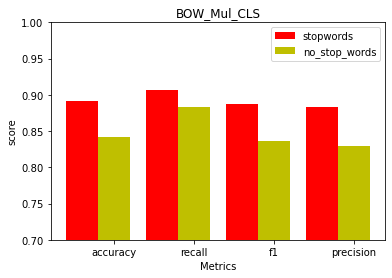

In [63]:
Mul_score_1=[acc_score1_1,recall_score1_1,f1_score1_1,pre_score1_1]
SGD_score_1=[acc_score2_1,recall_score2_1,f1_score2_1,pre_score2_1]
KNN_score_1=[acc_score3_1,recall_score3_1,f1_score3_1,pre_score3_1]
SVM_score_1=[acc_score4_1,recall_score4_1,f1_score4_1,pre_score4_1]

import matplotlib.pyplot as plt

name_list = ['accuracy','recall','f1','precision']
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.title("BOW_Mul_CLS")
plt.bar(x, Mul_score, width=width, label='stopwords',fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Mul_score_1, width=width, label='no_stop_words',
        tick_label = name_list,fc = 'y')

plt.ylim(0.7,1)
plt.xlabel("Metrics", loc='center')
plt.ylabel("score", loc='center')
plt.legend()
plt.show()


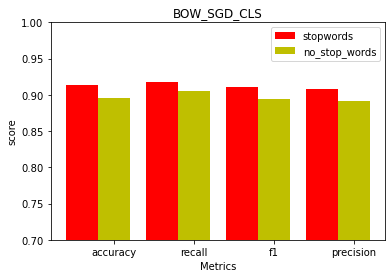

In [64]:
name_list = ['accuracy','recall','f1','precision']
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.title("BOW_SGD_CLS")
plt.bar(x, SGD_score, width=width, label='stopwords',fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, SGD_score_1, width=width, label='no_stop_words',
        tick_label = name_list,fc = 'y')

plt.ylim(0.7,1)
plt.xlabel("Metrics", loc='center')
plt.ylabel("score", loc='center')
plt.legend()
plt.show()

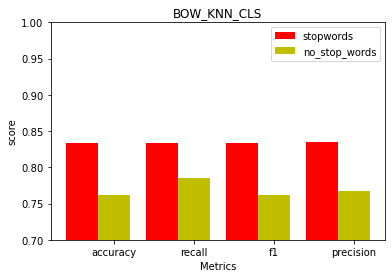

In [66]:
name_list = ['accuracy','recall','f1','precision']
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.title("BOW_KNN_CLS")
plt.bar(x, KNN_score, width=width, label='stopwords',fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, KNN_score_1, width=width, label='no_stop_words',
        tick_label = name_list,fc = 'y')

plt.ylim(0.7,1)
plt.xlabel("Metrics", loc='center')
plt.ylabel("score", loc='center')
plt.legend()
plt.show()

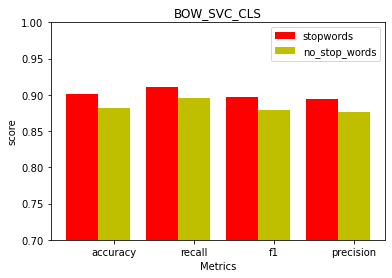

In [67]:
name_list = ['accuracy','recall','f1','precision']
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.title("BOW_SVC_CLS")
plt.bar(x, SVM_score, width=width, label='stopwords',fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, SVM_score_1, width=width, label='no_stop_words',
        tick_label = name_list,fc = 'y')

plt.ylim(0.7,1)
plt.xlabel("Metrics", loc='center')
plt.ylabel("score", loc='center')
plt.legend()
plt.show()